In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [22]:
import os
os.getcwd()
os.chdir('/home/piai/바탕화면/유아용품')

In [23]:
df_raw = pd.read_csv('Member_data.csv',encoding='euc-kr')
df_raw

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes
...,...,...,...,...,...,...,...,...
81355,20200724113017300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81356,20200729134409100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81357,20200803075905700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81358,20200805170229100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_raw.isnull().sum()

고객번호        0
성별        266
결혼유무      266
거주지역      266
연령        266
결제등록카드    266
유입경로      266
자녀여부      266
dtype: int64

In [25]:
# 결측치가 있는 열 삭제
df_raw_cleaned = df_raw.dropna(subset=['성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부'])

# 삭제 후 데이터 크기 출력
print(f"Before dropping: {df_raw.shape[0]} rows, After dropping: {df_raw_cleaned.shape[0]} rows")

Before dropping: 81360 rows, After dropping: 81094 rows


In [26]:
df_raw_cleaned.isnull().sum()

고객번호      0
성별        0
결혼유무      0
거주지역      0
연령        0
결제등록카드    0
유입경로      0
자녀여부      0
dtype: int64

In [29]:
# 모든 열에 결측치가 있는 행 삭제
df_cleaned = df_raw_cleaned.dropna(how='all')

# 삭제 후 데이터 크기 출력
print(f"Before dropping: {df_cleaned.shape[0]} rows, After dropping: {df_cleaned.shape[0]} rows")

Before dropping: 81094 rows, After dropping: 81094 rows


In [30]:
df_raw_cleaned.columns

Index(['고객번호', '성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부'], dtype='object')

In [31]:
# df_raw = df_raw.drop(columns=[' '])
df_raw_cleaned

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes
...,...,...,...,...,...,...,...,...
81089,201912291058164,여,기혼,경기,31.0,국민은행,오픈마켓,Yes
81090,201912291058167,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes
81091,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes
81092,201912291058169,여,기혼,경기,32.0,새마을금고,인스타그램,Yes


In [32]:
print(df_raw_cleaned.dtypes)

고객번호       object
성별         object
결혼유무       object
거주지역       object
연령        float64
결제등록카드     object
유입경로       object
자녀여부       object
dtype: object


In [33]:
# 각 변수의 고유한 값 개수 및 샘플 확인
# 한번씩 그냥 확인해보기 잘못된 샘플이 없는지

unique_values_summary = {
    "변수명": [],
    "고유값 개수": [],
    "샘플 값": []
}

for col in df_raw.columns:
    unique_values_summary["변수명"].append(col)
    unique_values_summary["고유값 개수"].append(len(df_raw_cleaned[col].unique()))
    unique_values_summary["샘플 값"].append(df_raw_cleaned[col].unique()[:5])  # 처음 5개 샘플 값

# 데이터프레임으로 변환
unique_values_df = pd.DataFrame(unique_values_summary)
unique_values_df

,변수명,고유값 개수,샘플 값
0,고객번호,81094,"[201812310749735, 201812310749770, 20181231074..."
1,성별,2,"[여, 남]"
2,결혼유무,2,"[기혼, 미혼]"
3,거주지역,15,"[인천, 제주, 부산, 경남, 서울]"
4,연령,27,"[37.0, 33.0, 32.0, 34.0, 26.0]"
5,결제등록카드,24,"[국민은행, 하나은행, 기업은행, 신한은행, 광주은행]"
6,유입경로,10,"[인스타그램, 검색광고, 네이버블로그, 지인추천, 직접검색]"
7,자녀여부,2,"[Yes, No]"


In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 고객번호 제외
df_encoded = df_raw_cleaned.drop(columns=['고객번호'])

# 수치형으로 변환할 범주형 변수 목록
categorical_cols = ['성별', '결혼유무', '거주지역', '결제등록카드', '유입경로', '자녀여부']

# Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
    
    # 각 범주와 매핑된 숫자 출력
    label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
    print(f"{col} 라벨 매핑: {label_mapping}")

성별 라벨 매핑: {'남': 0, '여': 1}
결혼유무 라벨 매핑: {'기혼': 0, '미혼': 1}
거주지역 라벨 매핑: {'강원': 0, '경기': 1, '경남': 2, '경북': 3, '광주': 4, '대구': 5, '대전': 6, '부산': 7, '서울': 8, '인천': 9, '전남': 10, '전북': 11, '제주': 12, '충남': 13, '충북': 14}
결제등록카드 라벨 매핑: {'BC카드': 0, 'SC제일은행': 1, '경남은행': 2, '광주은행': 3, '국민은행': 4, '국민카드': 5, '기업은행': 6, '농협중앙회': 7, '농협회원조합': 8, '대구은행': 9, '롯데카드': 10, '미래에셋증권': 11, '부산은행': 12, '삼성카드': 13, '새마을금고': 14, '신한은행': 15, '신한카드': 16, '신협중앙회': 17, '씨티은행': 18, '외환은행': 19, '우리은행': 20, '우체국': 21, '하나은행': 22, '현대카드': 23}
유입경로 라벨 매핑: {'검색광고': 0, '네이버블로그': 1, '네이버카페': 2, '매장쿠폰': 3, '오픈마켓': 4, '이마트': 5, '인스타그램': 6, '지인추천': 7, '직접검색': 8, '페이스북': 9}
자녀여부 라벨 매핑: {'No': 0, 'Yes': 1}


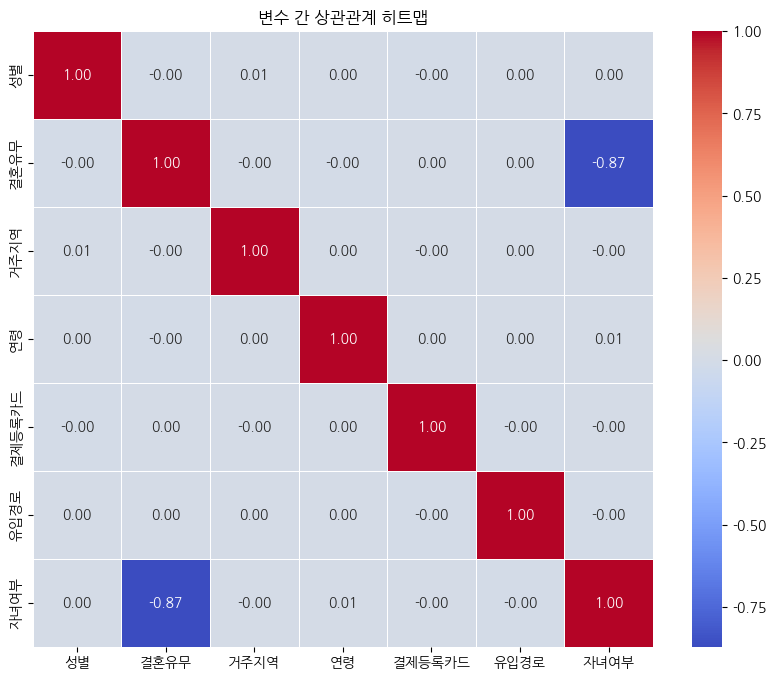

In [37]:
# 상관계수 행렬 계산
correlation_matrix = df_encoded.corr(method='pearson')

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('변수 간 상관관계 히트맵')
plt.show()


[0 1]
0    68529
1    12565
Name: 결혼유무, dtype: int64
0:기혼, 1:미혼


<Axes: >

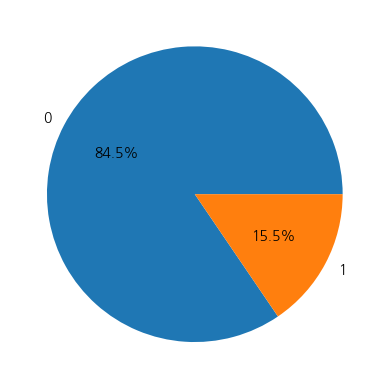

In [39]:
# 범주형 변수에서 고유한 값 확인
unique_value1 = df_encoded['결혼유무'].unique()

# 결과 출력
print(unique_value1)

# 범주형 변수의 값과 빈도 확인
value_count1 = df_encoded['결혼유무'].value_counts()

# 결과 출력
print(value_count1)
print("0:기혼, 1:미혼")

#성별 Pie Chart
# groupby(column):column기준 자료 요약.(size : group별 자료 수)
df_count = df_encoded.groupby(["결혼유무"] ).size()
# pie(데이터,labels=레이블  변수 지정,autopct=비율 %로 표시(%.1f%%: 소수점 1자리 적용)
df_count.plot.pie(y = "결혼유무", autopct="%.1f%%")

[1 0]
1    65345
0    15749
Name: 자녀여부, dtype: int64
0:NO, 1:YES


<Axes: >

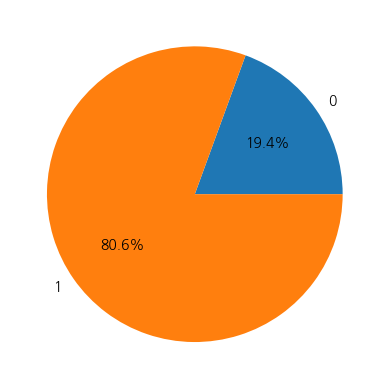

In [40]:
# 범주형 변수에서 고유한 값 확인

unique_value2 = df_encoded['자녀여부'].unique()

# 결과 출력
print(unique_value2)

# 범주형 변수의 값과 빈도 확인
value_count2 = df_encoded['자녀여부'].value_counts()

# 결과 출력
print(value_count2)
print("0:NO, 1:YES")

#자녀여부 Pie Chart
# groupby(column):column기준 자료 요약.(size : group별 자료 수)
df_count = df_encoded.groupby(["자녀여부"] ).size()
# pie(데이터,labels=레이블  변수 지정,autopct=비율 %로 표시(%.1f%%: 소수점 1자리 적용)
df_count.plot.pie(y = "자녀여부", autopct="%.1f%%")

0: 기혼, 1: 미혼
0: No, 1: Yes


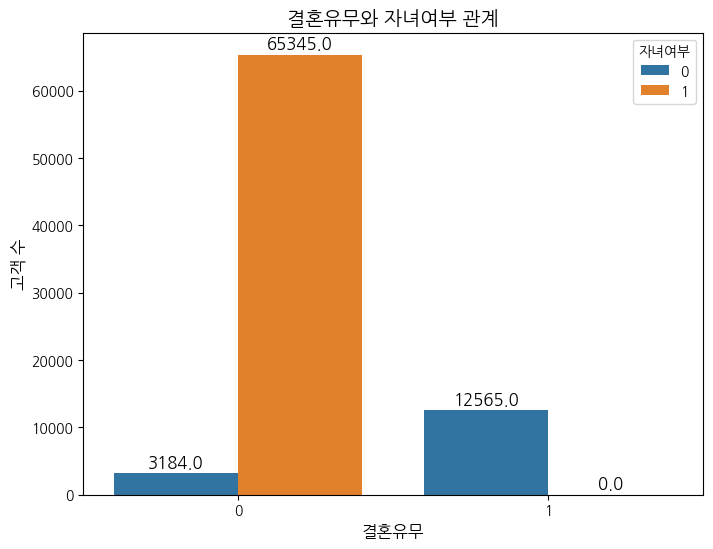

0:기혼, 1:미혼
0:NO, 1:YES


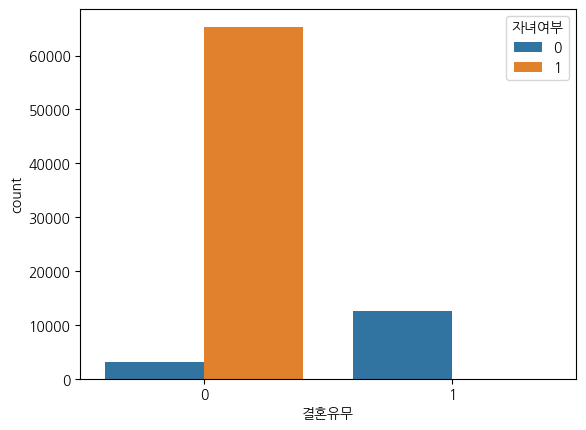

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# 성별 + 연령대에 대한 Bar Chart
plt.figure(figsize=(8,6))
ax = sns.countplot(x="결혼유무", hue="자녀여부", data=df_encoded)

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 8), textcoords='offset points')

# 그래프 제목 추가
plt.title('결혼유무와 자녀여부 관계', fontsize=14)
plt.xlabel('결혼유무', fontsize=12)
plt.ylabel('고객 수', fontsize=12)

# 레이블과 범례
print("0: 기혼, 1: 미혼")
print("0: No, 1: Yes")

# 그래프 출력
plt.show()

# 성별+연령대 Bar Chart
sns.countplot(x="결혼유무", hue="자녀여부", data=df_encoded)
print("0:기혼, 1:미혼")
print("0:NO, 1:YES")

0: 기혼, 1: 미혼
0: No, 1: Yes


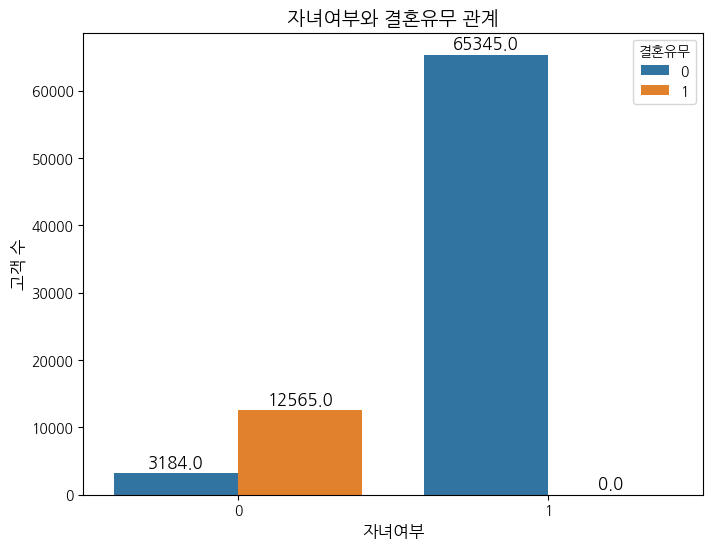

0:기혼, 1:미혼
0:NO, 1:YES


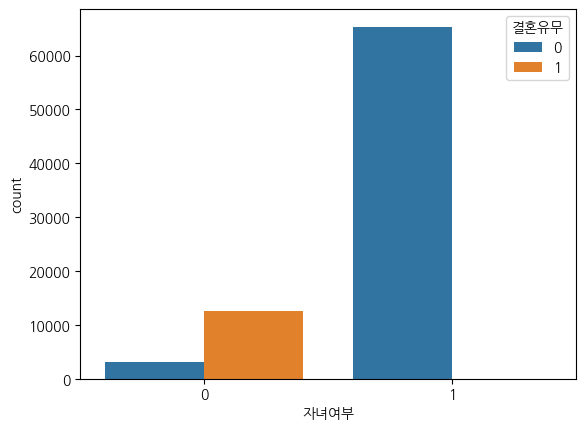

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# 성별 + 연령대에 대한 Bar Chart
plt.figure(figsize=(8,6))
ax = sns.countplot(x="자녀여부", hue="결혼유무", data=df_encoded)

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 8), textcoords='offset points')

# 그래프 제목 추가
plt.title('자녀여부와 결혼유무 관계', fontsize=14)
plt.xlabel('자녀여부', fontsize=12)
plt.ylabel('고객 수', fontsize=12)

# 레이블과 범례
print("0: 기혼, 1: 미혼")
print("0: No, 1: Yes")

# 그래프 출력
plt.show()

# 성별+연령대 Bar Chart
sns.countplot(x="자녀여부", hue="결혼유무", data=df_encoded)
print("0:기혼, 1:미혼")
print("0:NO, 1:YES")

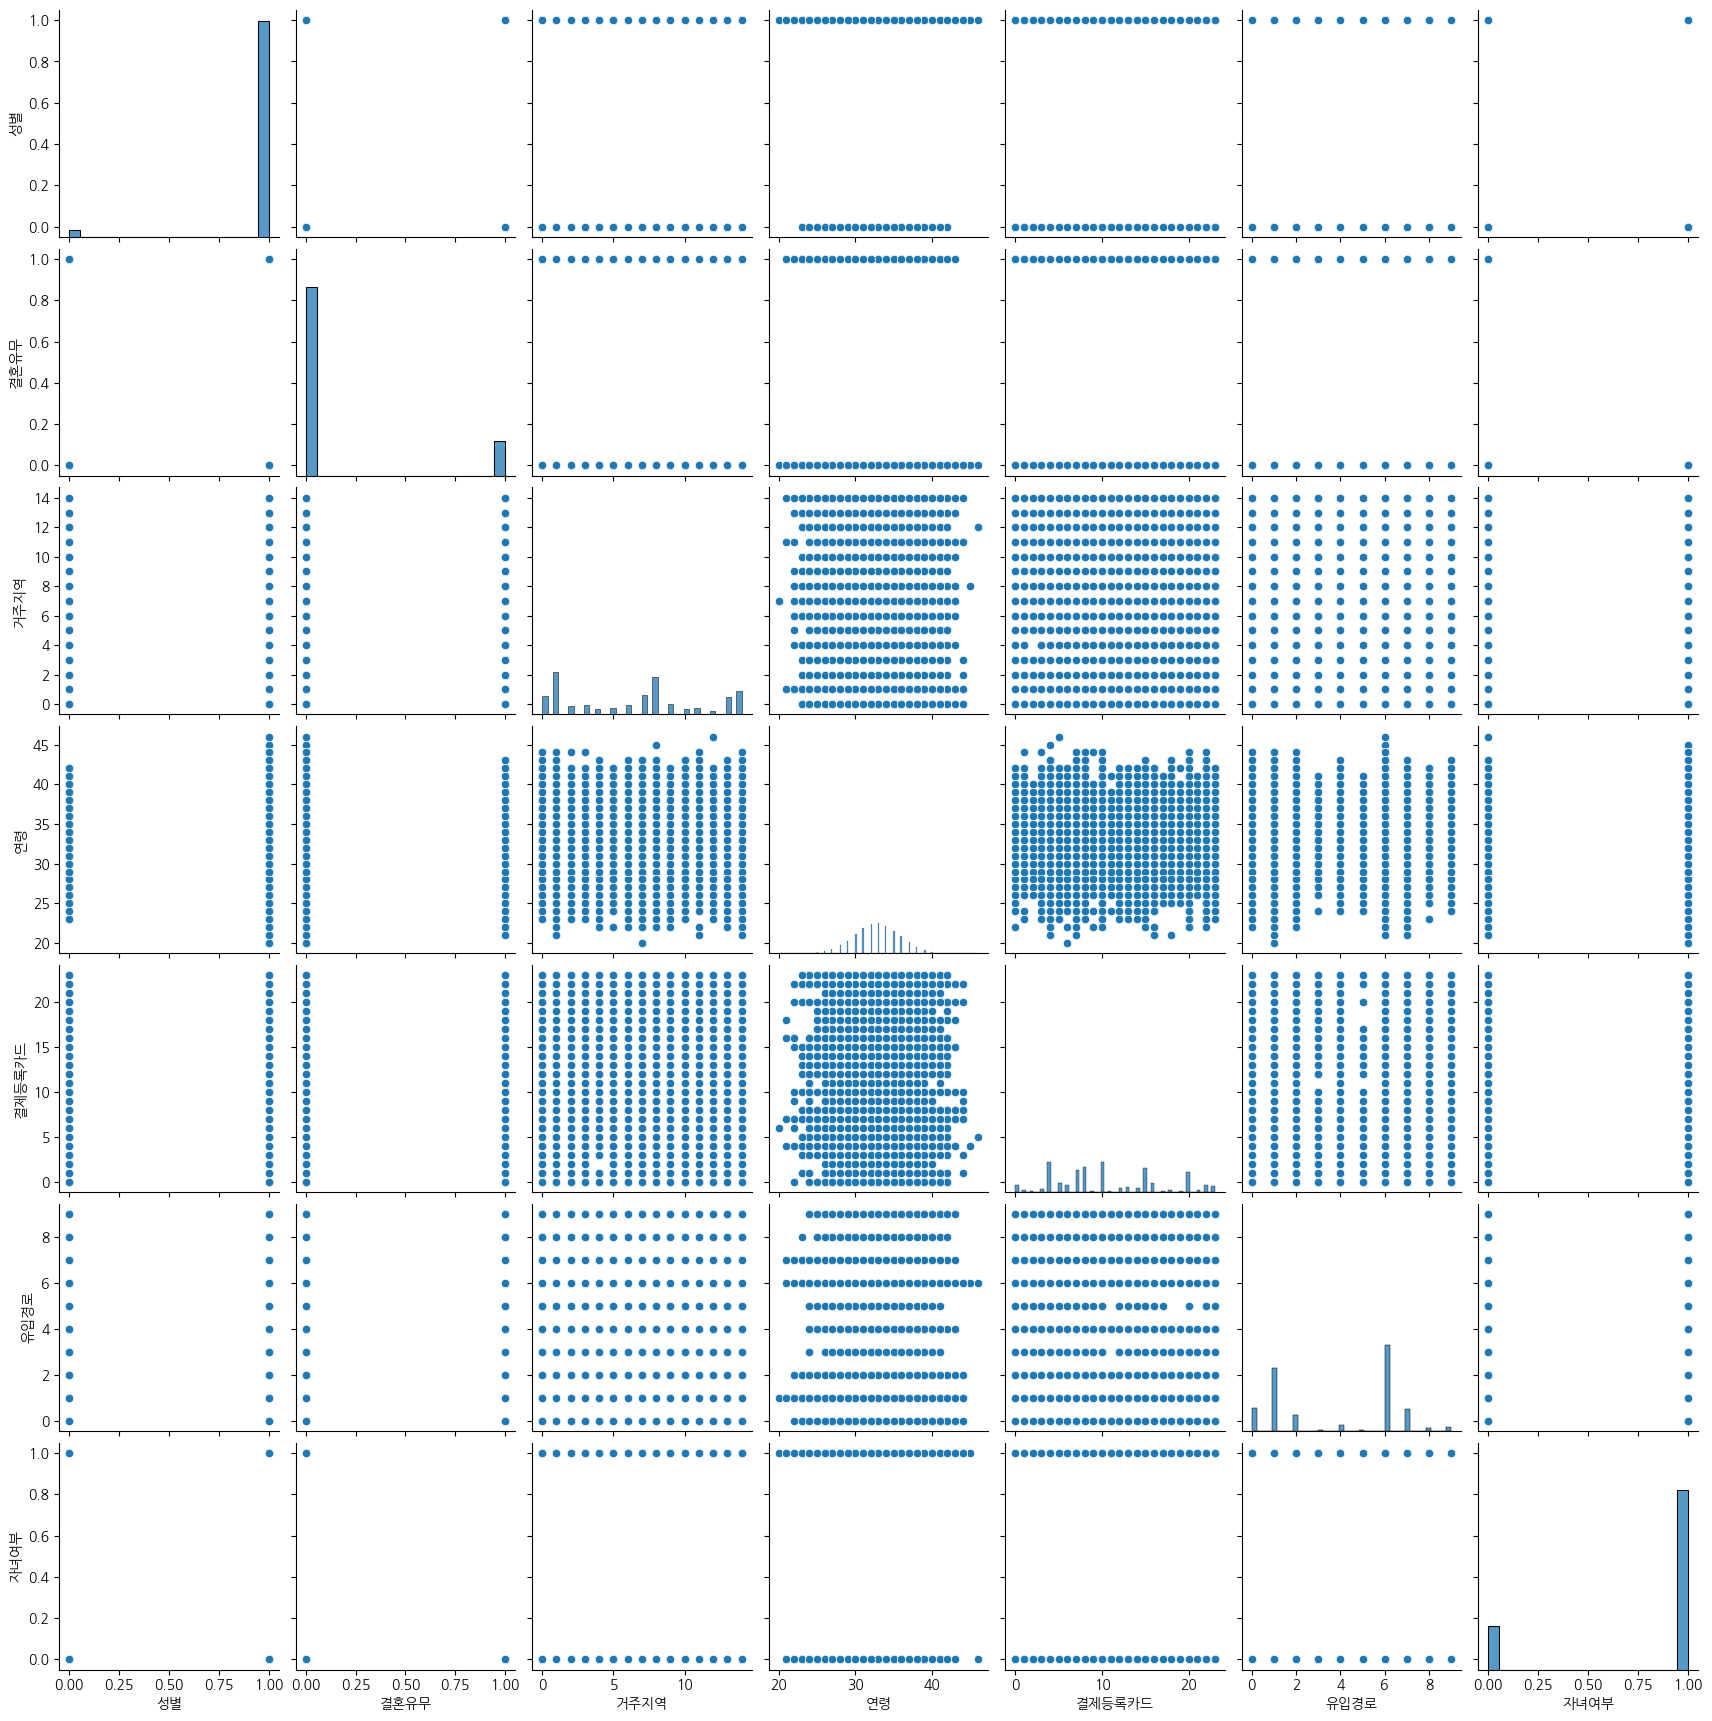

In [43]:
# pairplot(데이터): Scatter Plot  그래프 생성
sns.pairplot(df_encoded)

array([[<Axes: title={'center': '성별'}>, <Axes: title={'center': '결혼유무'}>,
        <Axes: title={'center': '거주지역'}>],
       [<Axes: title={'center': '연령'}>,
        <Axes: title={'center': '결제등록카드'}>,
        <Axes: title={'center': '유입경로'}>],
       [<Axes: title={'center': '자녀여부'}>, <Axes: >, <Axes: >]],
      dtype=object)

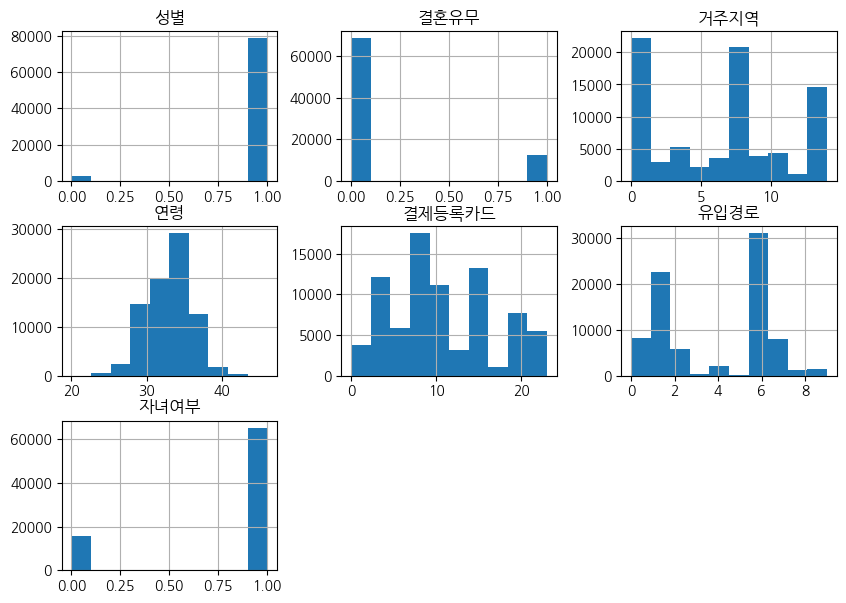

In [44]:
# hist(figsiz) : figsize = (x축 크기, y축 크기)-그래프 영역별 중첩 처리
df_encoded.hist(figsize = (10,7))

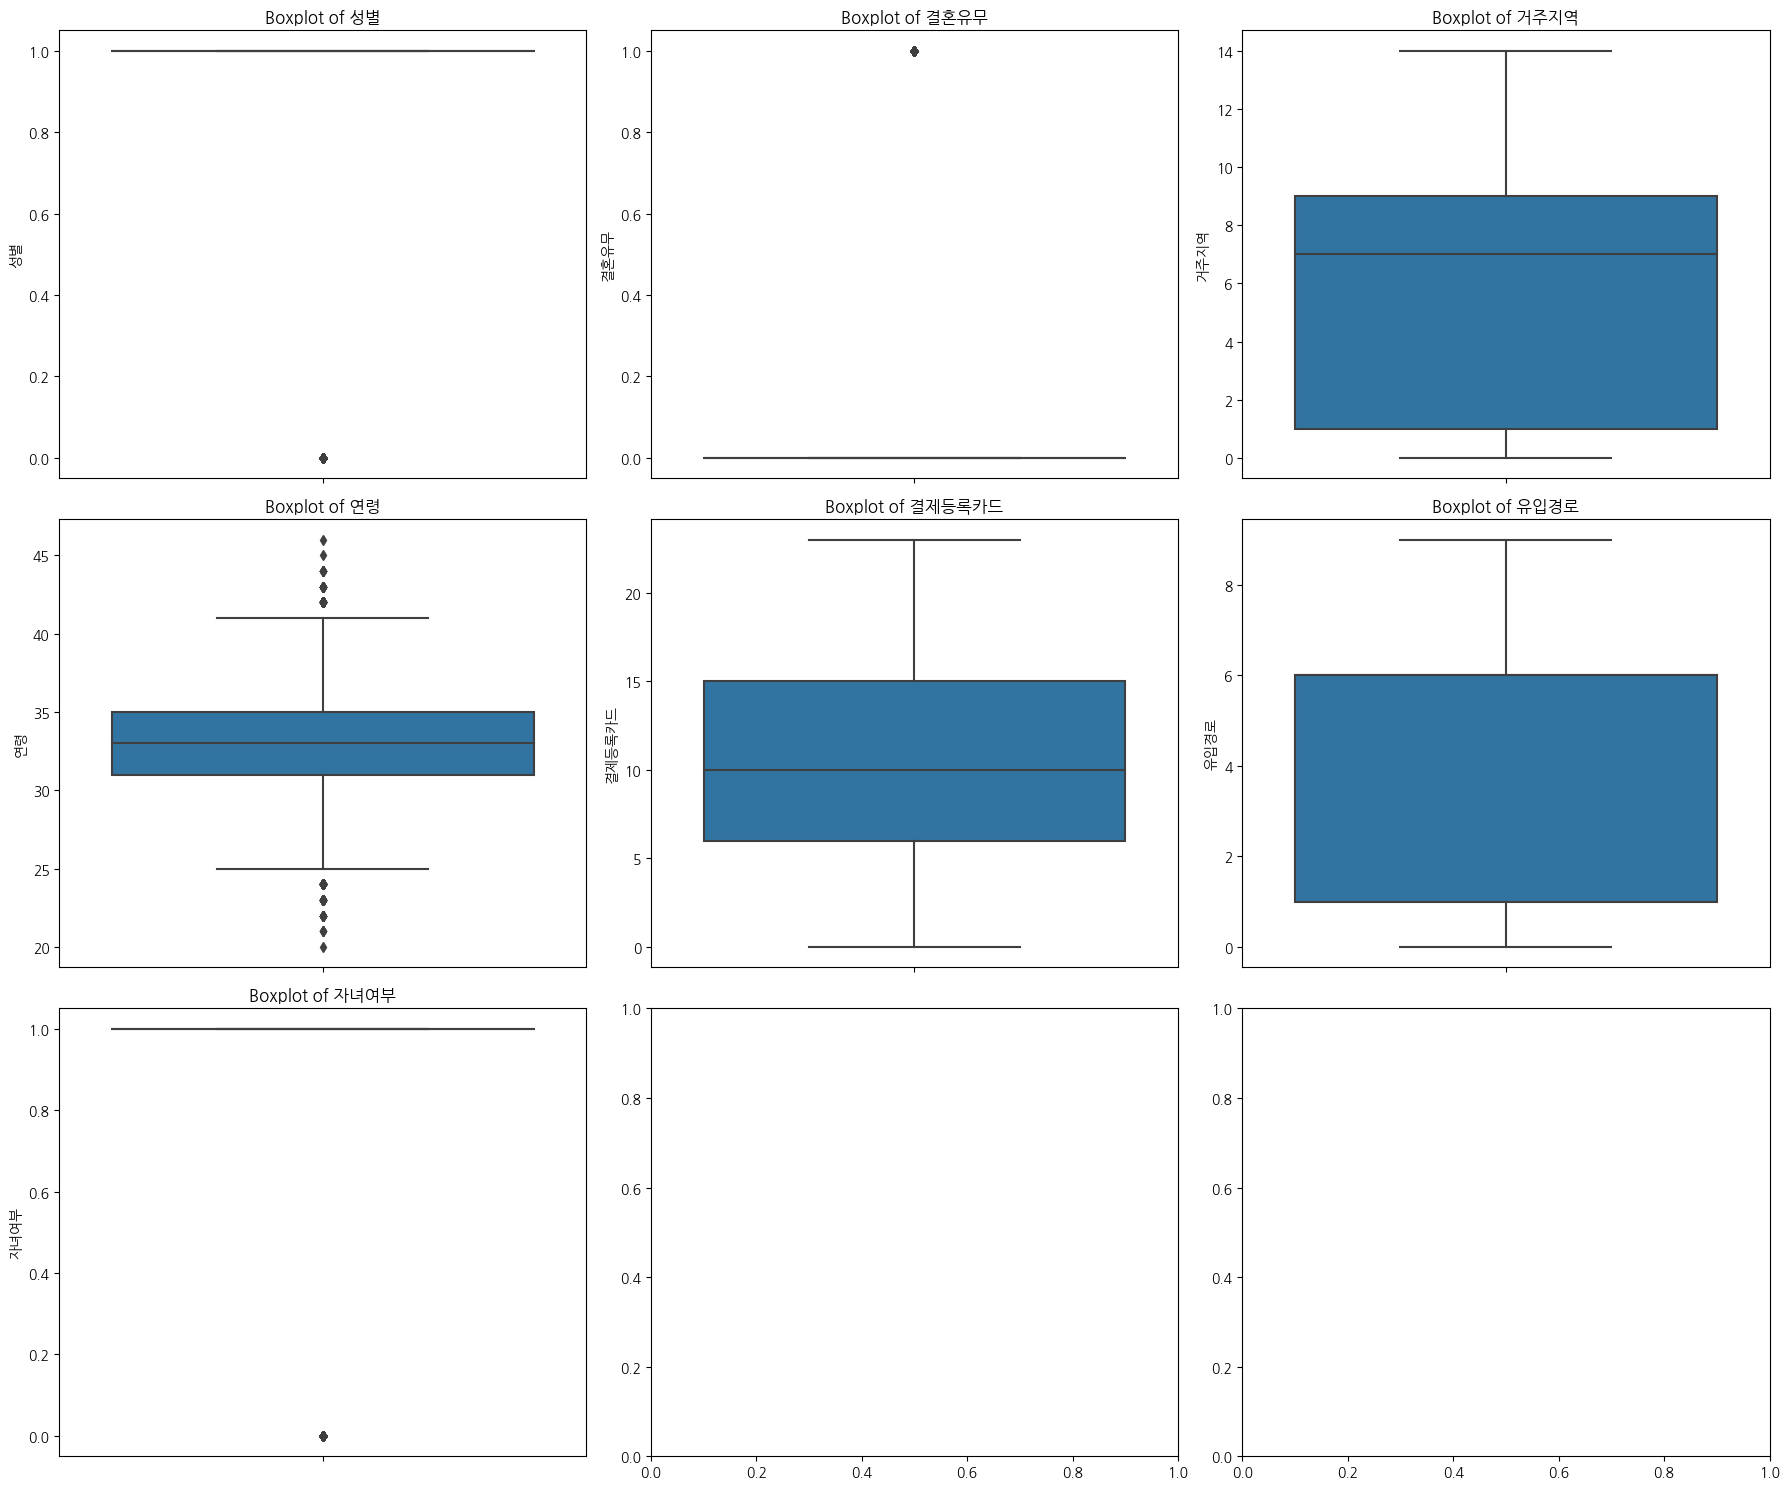

In [46]:
# 가격과 연속형 변수들의 산점도 시각화
# fig, axes = plt.subplots(2, 2, figsize=(18, 15))
columns_to_plot = ['성별', '결혼유무', '거주지역', '연령', '결제등록카드', '유입경로', '자녀여부']

# 연속형 변수별 박스플롯 시각화 (이상치 확인)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
for i, col in enumerate(columns_to_plot):
    row, col_idx = divmod(i, 3)
    sns.boxplot(y=df_encoded[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

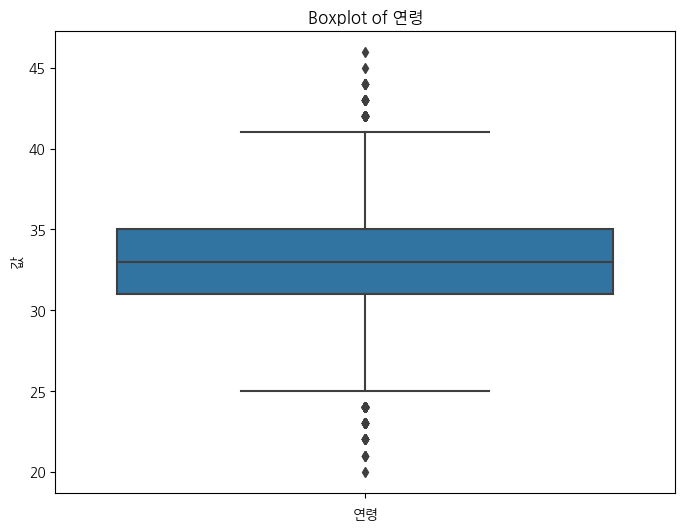

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# 연령에 대한 박스 플롯 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_encoded['연령'])

# 그래프 제목과 라벨 설정
plt.title('Boxplot of 연령', fontsize=12)
plt.xlabel('연령', fontsize=10)
plt.ylabel('값', fontsize=10)

# 그래프 출력
plt.show()

In [110]:
df_encoded['연령대'] = pd.cut(df_encoded['연령'], bins=[0, 30, 40, 70], labels=['0-30', '30-40', '40-70'])

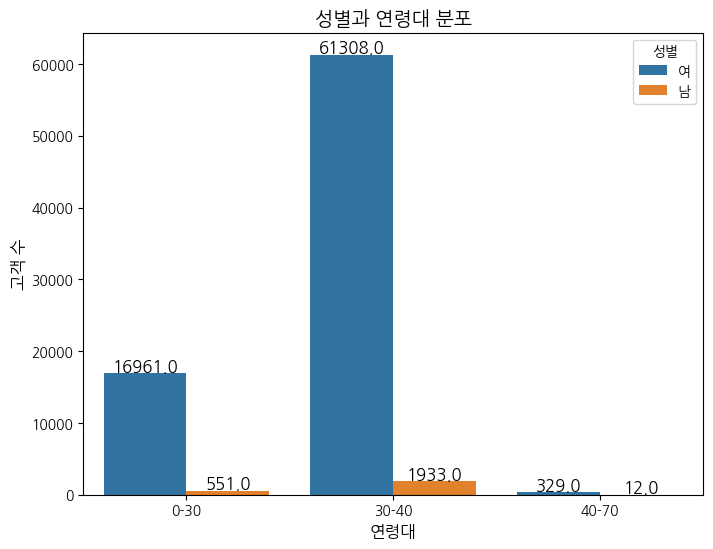

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# 연령대 Bar Chart (성별을 hue로)
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
ax = sns.countplot(x="연령대", hue="성별", data=df_encoded)

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # 각 막대의 높이를 표시 (빈도수)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # 막대 중앙에 위치
                ha='center', va='center',  # 수평, 수직 중앙 정렬
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')  # 텍스트 위치 조정

# 그래프 제목과 레이블 설정
plt.title('성별과 연령대 분포', fontsize=14)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('고객 수', fontsize=12)

# 그래프 출력
plt.show()


In [116]:
unique_values = df_encoded['연령대'].value_counts() 
unique_values

30-40    63241
0-30     17512
40-70      341
Name: 연령대, dtype: int64

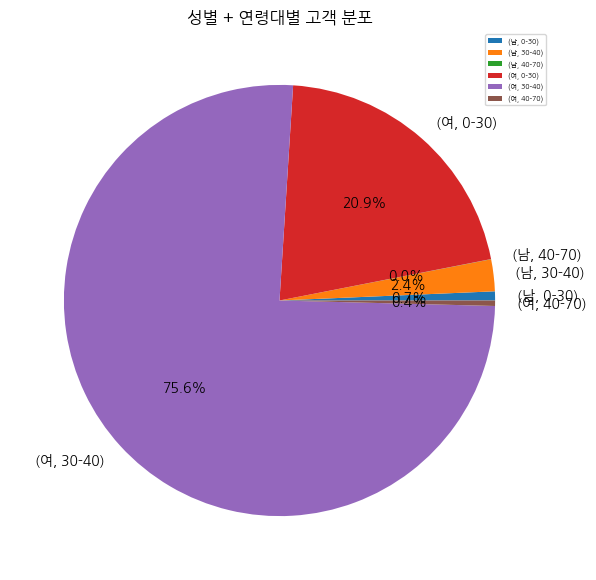

In [117]:
import matplotlib.pyplot as plt

# 성별 + 연령대별로 그룹화한 후 고객 수 계산
df_count = df_encoded.groupby(["성별", "연령대"]).size()

# 파이차트 그리기
ax = df_count.plot.pie(autopct="%.1f%%", figsize=(7, 7))

# 라벨 폰트 사이즈 조정
plt.legend(fontsize=5)  # fontsize를 원하는 크기로 설정 (여기서는 8)

# 그래프 제목 추가
plt.title("성별 + 연령대별 고객 분포")

# 파이차트 표시
plt.show()

In [118]:
# 성별 + 연령대별로 고객 수 카운트
df_count = df_encoded.groupby(["성별", "연령대"]).size()

# 그룹별 고객 수 확인 (각 그룹의 빈도 카운트)
group_counts = df_count.value_counts()

# 결과 출력
print(group_counts)

551      1
1933     1
12       1
16961    1
61308    1
329      1
dtype: int64


['국민은행' '하나은행' '기업은행' '신한은행' '광주은행' 'BC카드' '우리은행' '농협회원조합' '신협중앙회' '롯데카드'
 '대구은행' '국민카드' '농협중앙회' '새마을금고' '우체국' 'SC제일은행' '현대카드' '신한카드' '삼성카드' '외환은행'
 '부산은행' '씨티은행' '미래에셋증권' '경남은행' nan]
국민은행      11016
롯데카드      10913
농협회원조합     9168
신한은행       8700
농협중앙회      7937
우리은행       7313
국민카드       3416
신한카드       3227
하나은행       2660
BC카드       2651
기업은행       2441
현대카드       2161
삼성카드       1738
부산은행       1382
새마을금고      1327
광주은행       1149
SC제일은행      845
씨티은행        692
우체국         635
외환은행        450
대구은행        443
신협중앙회       407
경남은행        216
미래에셋증권      207
Name: 결제등록카드, dtype: int64


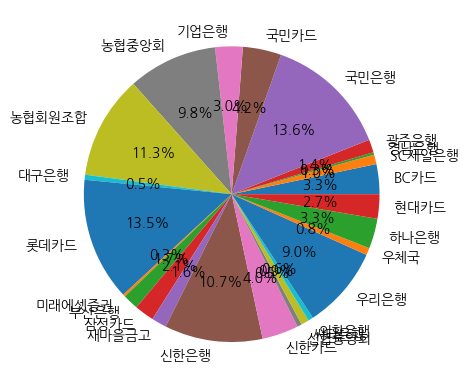

In [53]:
#성별 Pie Chart
# groupby(column):column기준 자료 요약.(size : group별 자료 수)
df_count = df_raw.groupby(["결제등록카드"] ).size()
# pie(데이터,labels=레이블  변수 지정,autopct=비율 %로 표시(%.1f%%: 소수점 1자리 적용)
df_count.plot.pie(y = "결제등록카드", autopct="%.1f%%")

# 결제등록카드에 있는 고유한 값 확인
unique_values = df_raw['결제등록카드'].unique()
# 결과 출력
print(unique_values)


# 결제등록카드에 있는 각 값과 그 빈도 확인
value_counts = df_raw['결제등록카드'].value_counts()

# 결과 출력
print(value_counts)

['인스타그램' '검색광고' '네이버블로그' '지인추천' '직접검색' '네이버카페' '오픈마켓' '페이스북' '매장쿠폰' '이마트'
 nan]
인스타그램     31167
네이버블로그    22684
검색광고       8259
지인추천       8021
네이버카페      5725
오픈마켓       2022
페이스북       1405
직접검색       1137
매장쿠폰        456
이마트         218
Name: 유입경로, dtype: int64


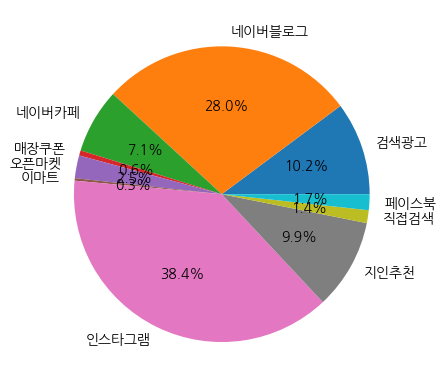

In [54]:
#Pie Chart
# groupby(column):column기준 자료 요약.(size : group별 자료 수)
df_count = df_raw.groupby(["유입경로"] ).size()
# pie(데이터,labels=레이블  변수 지정,autopct=비율 %로 표시(%.1f%%: 소수점 1자리 적용)
df_count.plot.pie(y = "유입경로", autopct="%.1f%%")

# 결제등록카드에 있는 고유한 값 확인
unique_values = df_raw['유입경로'].unique()
# 결과 출력
print(unique_values)


# 결제등록카드에 있는 각 값과 그 빈도 확인
value_counts = df_raw['유입경로'].value_counts()

# 결과 출력
print(value_counts)

['인천' '제주' '부산' '경남' '서울' '경기' '충북' '광주' '충남' '경북' '대전' '강원' '대구' '전남'
 '전북' nan]
경기    15402
서울    13725
충북     8378
부산     7162
강원     6760
충남     6292
인천     3884
대전     3506
경북     3365
경남     3022
전북     2293
대구     2219
전남     2026
광주     1967
제주     1093
Name: 거주지역, dtype: int64


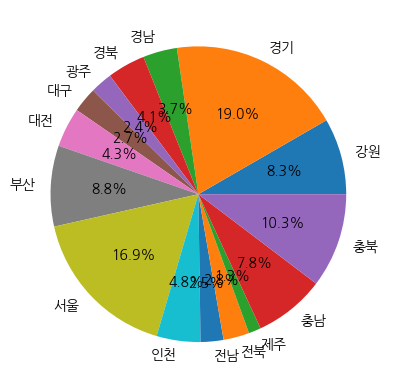

In [55]:
#성별 Pie Chart
# groupby(column):column기준 자료 요약.(size : group별 자료 수)
df_count = df_raw.groupby(["거주지역"] ).size()
# pie(데이터,labels=레이블  변수 지정,autopct=비율 %로 표시(%.1f%%: 소수점 1자리 적용)
df_count.plot.pie(y = "거주지역", autopct="%.1f%%")

# 결제등록카드에 있는 고유한 값 확인
unique_values = df_raw['거주지역'].unique()
# 결과 출력
print(unique_values)


# 결제등록카드에 있는 각 값과 그 빈도 확인
value_counts = df_raw['거주지역'].value_counts()

# 결과 출력
print(value_counts)

In [104]:
# 거주지역을 적당히 분류하여 새로운 파생변수 생성
def classify_region(region):
    if region in ['서울', '경기', '인천']:
        return '수도권'
    elif region in ['부산', '대구', '경북', '경남', '울산']:
        return '영남권'
    elif region in ['광주', '전남', '전북']:
        return '호남권'
    elif region in ['충북', '충남', '대전']:
        return '충청권'
    elif region in ['강원', '제주']:
        return '강원제주'
    else:
        return '기타'

# '거주지역'이 이미 문자열이라면, 해당 지역을 '지역군'으로 분류
df_encoded['지역군'] = df_raw['거주지역'].apply(classify_region)


result = pd.concat([df_raw['거주지역'], df_encoded['지역군']], axis=1)

# 결과 출력
print(result.head(5))

  거주지역   지역군
0   인천   수도권
1   제주  강원제주
2   부산   영남권
3   경남   영남권
4   서울   수도권


In [112]:
import pandas as pd

# 결제등록카드를 적당히 분류하는 함수 생성
def classify_card(card):
    # 은행 카드
    bank_cards = ['국민은행', '하나은행', '기업은행', '신한은행', '광주은행', '농협회원조합', '농협중앙회', '대구은행', '부산은행', '경남은행']
    # 카드사
    card_companies = ['BC카드', '롯데카드', '신한카드', '삼성카드', '현대카드', '국민카드']
    # 기타
    other_cards = ['신협중앙회', '새마을금고', '우체국', 'SC제일은행', '외환은행', '미래에셋증권', '씨티은행']

    if card in bank_cards:
        return '은행 카드'
    elif card in card_companies:
        return '카드사'
    elif card in other_cards:
        return '제2금융'
    else:
        return '기타'

# '결제등록카드'를 분류하여 새로운 파생변수 '카드군' 생성
df_encoded['카드군'] = df_encoded['결제등록카드'].apply(classify_card)

# 결과 확인
print(df_encoded[['결제등록카드', '카드군']].head())


  결제등록카드    카드군
0   국민은행  은행 카드
1   국민은행  은행 카드
2   하나은행  은행 카드
3   기업은행  은행 카드
4   신한은행  은행 카드


In [113]:
import pandas as pd

# 유입경로를 적당히 분류하는 함수 생성
def classify_source(source):
    # 소셜 미디어
    social_media = ['인스타그램', '페이스북']
    # 검색 광고
    search_ads = ['검색광고', '네이버블로그', '네이버카페']
    # 추천/이벤트
    recommendations = ['지인추천', '매장쿠폰', '이마트']
    # 기타
    others = ['오픈마켓', '직접검색']

    if source in social_media:
        return '소셜 미디어'
    elif source in search_ads:
        return '검색 광고'
    elif source in recommendations:
        return '추천/이벤트'
    elif source in others:
        return '기타'
    else:
        return '기타'

# '유입경로'를 분류하여 새로운 파생변수 '유입경로군' 생성
df_encoded['유입경로군'] = df_encoded['유입경로'].apply(classify_source)

# 결과 확인
print(df_encoded[['유입경로', '유입경로군']].head())

     유입경로   유입경로군
0   인스타그램  소셜 미디어
1    검색광고   검색 광고
2  네이버블로그   검색 광고
3    지인추천  추천/이벤트
4    직접검색      기타


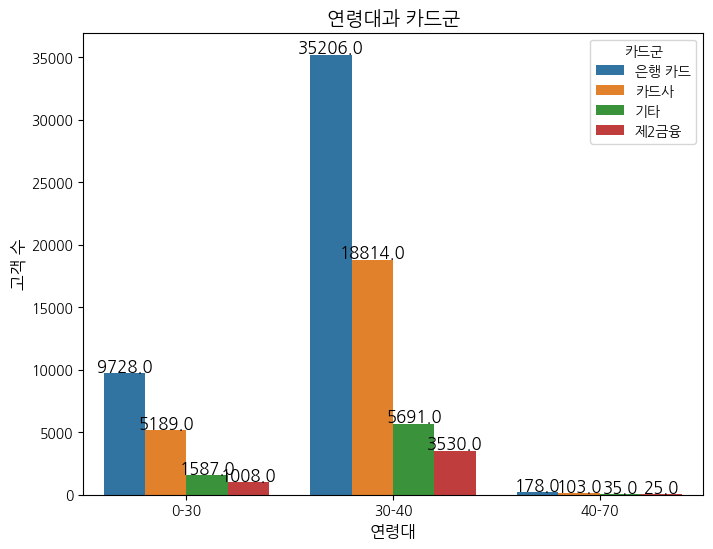

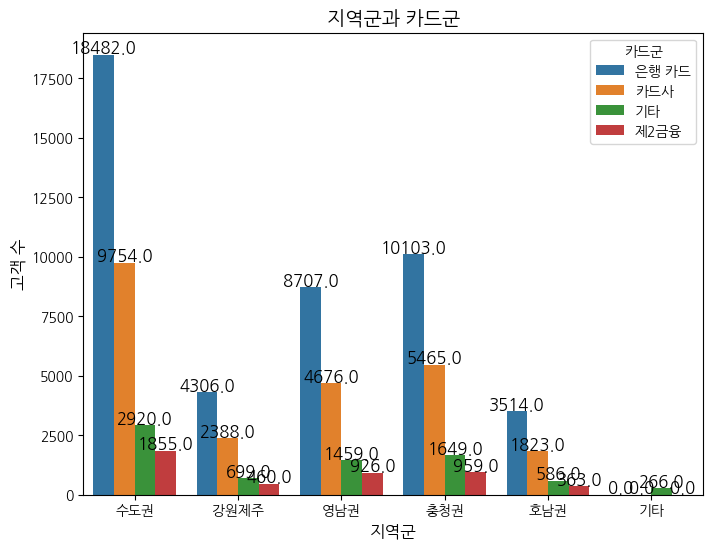

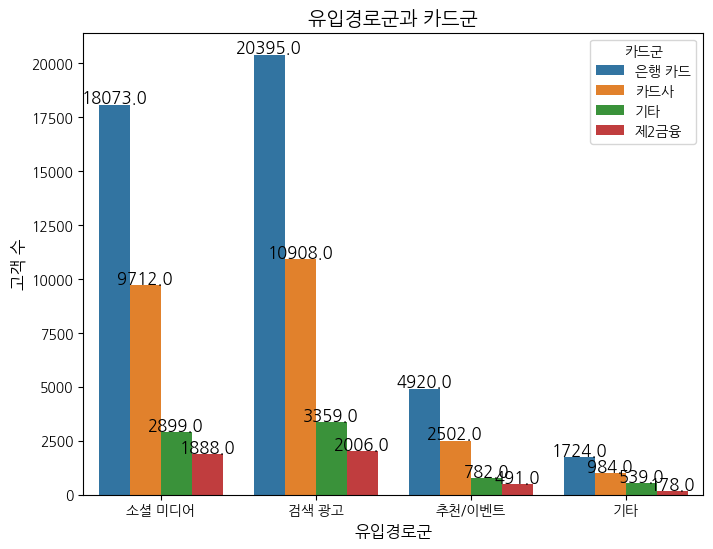

In [138]:
# 카드군 VS

import seaborn as sns
import matplotlib.pyplot as plt

# 지역군과 카드군에 대한 countplot
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
ax = sns.countplot(x="연령대", hue="카드군", data=df_encoded)

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # 각 막대의 높이를 표시 (빈도수)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # 막대 중앙에 위치
                ha='center', va='center',  # 수평, 수직 중앙 정렬
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')  # 텍스트 위치 조정

# 그래프 제목과 레이블 설정
plt.title('연령대과 카드군', fontsize=14)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('고객 수', fontsize=12)

# 그래프 출력
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# 지역군과 카드군에 대한 countplot
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
ax = sns.countplot(x="지역군", hue="카드군", data=df_encoded)

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # 각 막대의 높이를 표시 (빈도수)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # 막대 중앙에 위치
                ha='center', va='center',  # 수평, 수직 중앙 정렬
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')  # 텍스트 위치 조정

# 그래프 제목과 레이블 설정
plt.title('지역군과 카드군', fontsize=14)
plt.xlabel('지역군', fontsize=12)
plt.ylabel('고객 수', fontsize=12)

# 그래프 출력
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# 지역군과 카드군에 대한 countplot
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
ax = sns.countplot(x="유입경로군", hue="카드군", data=df_encoded)

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # 각 막대의 높이를 표시 (빈도수)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # 막대 중앙에 위치
                ha='center', va='center',  # 수평, 수직 중앙 정렬
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')  # 텍스트 위치 조정

# 그래프 제목과 레이블 설정
plt.title('유입경로군과 카드군', fontsize=14)
plt.xlabel('유입경로군', fontsize=12)
plt.ylabel('고객 수', fontsize=12)

# 그래프 출력
plt.show()



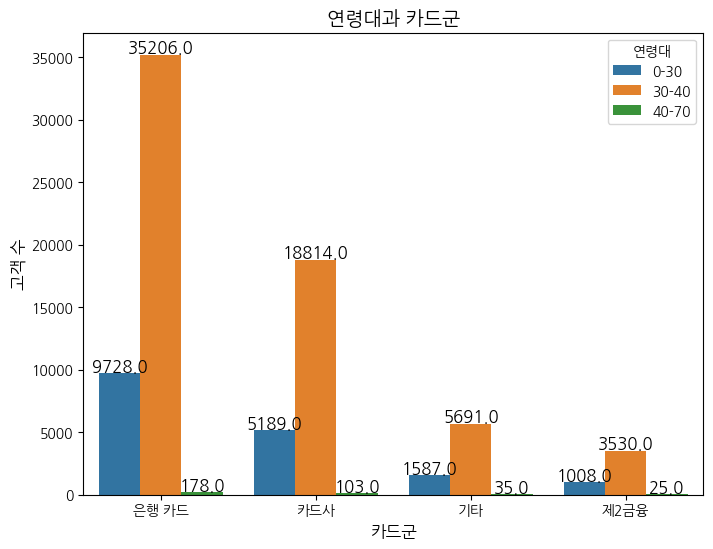

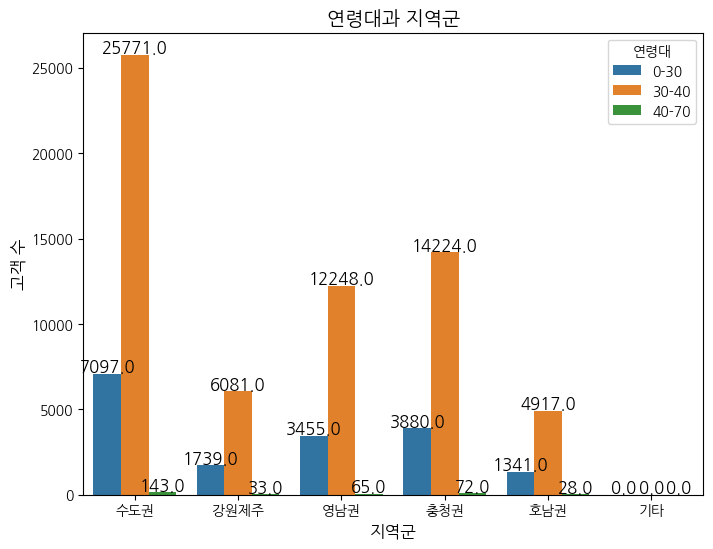

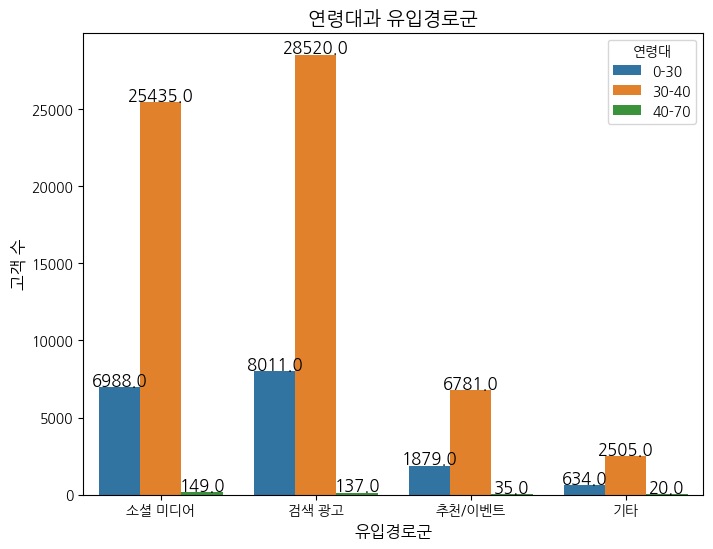

In [139]:
# 연령대 VS

import seaborn as sns
import matplotlib.pyplot as plt

# 카드군과 연령대에 대한 countplot
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
ax = sns.countplot(x="카드군", hue="연령대", data=df_encoded)

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # 각 막대의 높이를 표시 (빈도수)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # 막대 중앙에 위치
                ha='center', va='center',  # 수평, 수직 중앙 정렬
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')  # 텍스트 위치 조정

# 그래프 제목과 레이블 설정
plt.title('연령대과 카드군', fontsize=14)
plt.xlabel('카드군', fontsize=12)
plt.ylabel('고객 수', fontsize=12)

# 그래프 출력
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# 지역군과 연령대에 대한 countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="지역군", hue="연령대", data=df_encoded)

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # 각 막대의 높이를 표시 (빈도수)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # 막대 중앙에 위치
                ha='center', va='center',  # 수평, 수직 중앙 정렬
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')  # 텍스트 위치 조정

# 그래프 제목과 레이블 설정
plt.title('연령대과 지역군', fontsize=14)
plt.xlabel('지역군', fontsize=12)
plt.ylabel('고객 수', fontsize=12)

# 그래프 출력
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# 유입경로군과 연령대에 대한 countplot
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
ax = sns.countplot(x="유입경로군", hue="연령대", data=df_encoded)

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # 각 막대의 높이를 표시 (빈도수)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # 막대 중앙에 위치
                ha='center', va='center',  # 수평, 수직 중앙 정렬
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')  # 텍스트 위치 조정

# 그래프 제목과 레이블 설정
plt.title('연령대과 유입경로군', fontsize=14)
plt.xlabel('유입경로군', fontsize=12)
plt.ylabel('고객 수', fontsize=12)

# 그래프 출력
plt.show()

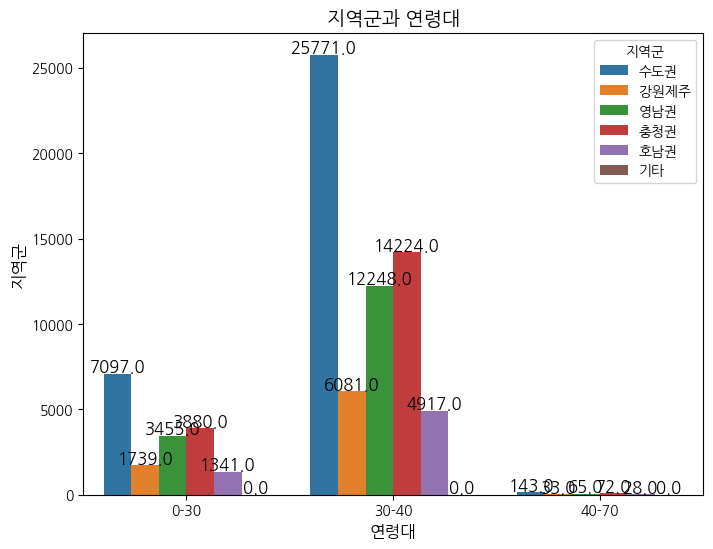

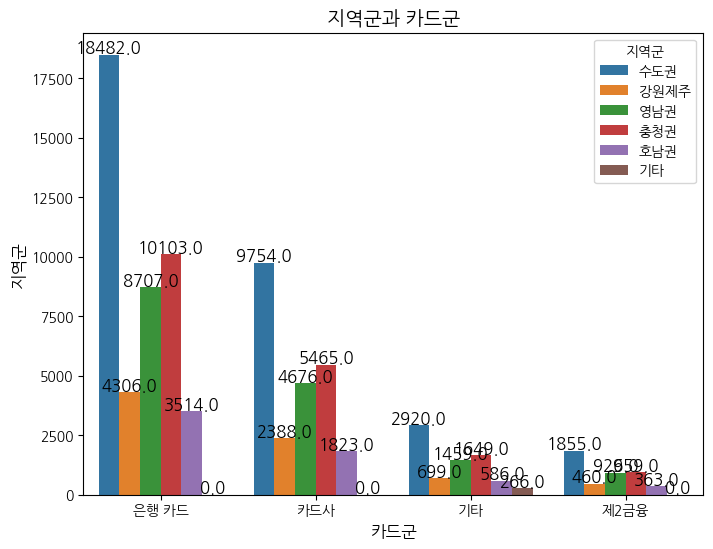

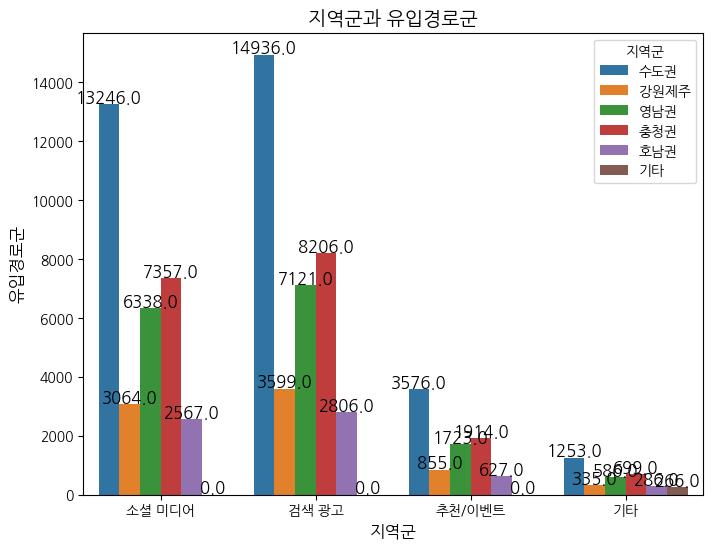

In [146]:
# 지역군 VS

import seaborn as sns
import matplotlib.pyplot as plt

# 유입경로군과 연령대에 대한 countplot
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
ax = sns.countplot(x="연령대", hue="지역군", data=df_encoded)

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # 각 막대의 높이를 표시 (빈도수)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # 막대 중앙에 위치
                ha='center', va='center',  # 수평, 수직 중앙 정렬
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')  # 텍스트 위치 조정

# 그래프 제목과 레이블 설정
plt.title('지역군과 연령대', fontsize=14)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('지역군', fontsize=12)

# 그래프 출력
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# 유입경로군과 연령대에 대한 countplot
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
ax = sns.countplot(x="카드군", hue="지역군", data=df_encoded)

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # 각 막대의 높이를 표시 (빈도수)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # 막대 중앙에 위치
                ha='center', va='center',  # 수평, 수직 중앙 정렬
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')  # 텍스트 위치 조정

plt.title('지역군과 카드군', fontsize=14)
plt.xlabel('카드군', fontsize=12)
plt.ylabel('지역군', fontsize=12)
    
    
import seaborn as sns
import matplotlib.pyplot as plt

# 유입경로군과 연령대에 대한 countplot
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
ax = sns.countplot(x="유입경로군", hue="지역군", data=df_encoded)

# 각 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # 각 막대의 높이를 표시 (빈도수)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # 막대 중앙에 위치
                ha='center', va='center',  # 수평, 수직 중앙 정렬
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')  # 텍스트 위치 조정

# 그래프 제목과 레이블 설정
plt.title('지역군과 유입경로군', fontsize=14)
plt.xlabel('지역군', fontsize=12)
plt.ylabel('유입경로군', fontsize=12)

# 그래프 출력
plt.show()
